<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-16 19:16:49.920138


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

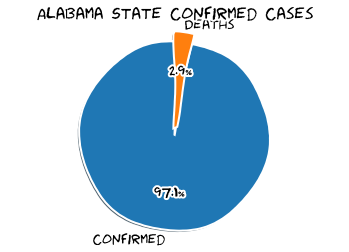

Alabama State Total Population
4887871
Alabama State Confirmed
26912 (0.5505873620641788% of population)
Alabama State Deaths
785 (2.9169143876337693% of confirmed)



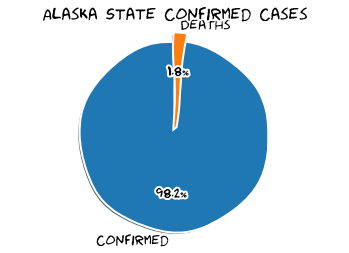

Alaska State Total Population
737438
Alaska State Confirmed
663 (0.08990586327257342% of population)
Alaska State Deaths
12 (1.809954751131222% of confirmed)



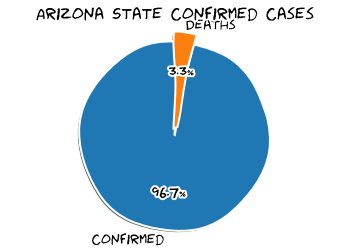

Arizona State Total Population
7171646
Arizona State Confirmed
36844 (0.5137453800703492% of population)
Arizona State Deaths
1201 (3.2596895016827707% of confirmed)



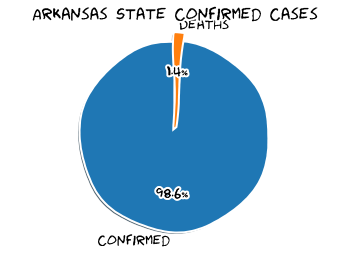

Arkansas State Total Population
3013825
Arkansas State Confirmed
12917 (0.4285915738305973% of population)
Arkansas State Deaths
182 (1.4089958968800804% of confirmed)



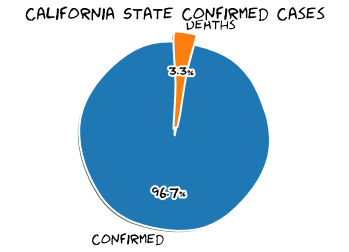

California State Total Population
39557045
California State Confirmed
155810 (0.3938868537829355% of population)
California State Deaths
5116 (3.283486297413517% of confirmed)



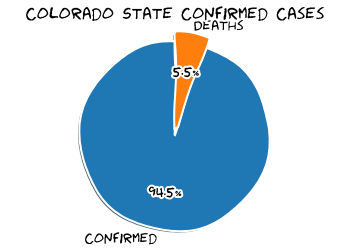

Colorado State Total Population
5695564
Colorado State Confirmed
29284 (0.5141545244685162% of population)
Colorado State Deaths
1605 (5.480808632700451% of confirmed)



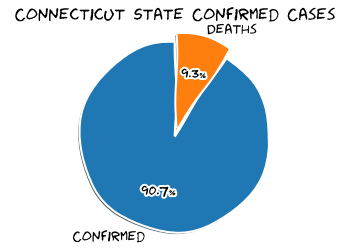

Connecticut State Total Population
3572665
Connecticut State Confirmed
45235 (1.2661416617566998% of population)
Connecticut State Deaths
4204 (9.293688515530011% of confirmed)



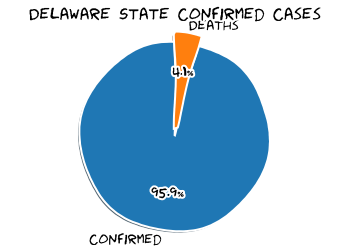

Delaware State Total Population
967171
Delaware State Confirmed
10403 (1.0756112414454113% of population)
Delaware State Deaths
424 (4.0757473805633% of confirmed)



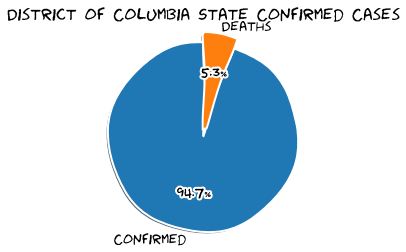

District of Columbia State Total Population
702455
District of Columbia State Confirmed
9818 (1.3976696016114911% of population)
District of Columbia State Deaths
520 (5.296394377673661% of confirmed)



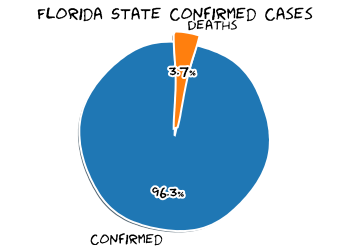

Florida State Total Population
21299325
Florida State Confirmed
80109 (0.37611051054434824% of population)
Florida State Deaths
2993 (3.736159482704815% of confirmed)



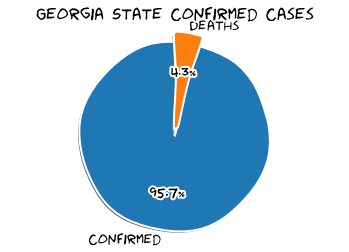

Georgia State Total Population
10519475
Georgia State Confirmed
58414 (0.5552938716048091% of population)
Georgia State Deaths
2494 (4.269524429075221% of confirmed)



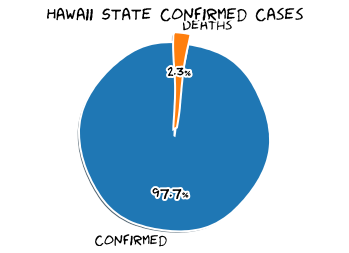

Hawaii State Total Population
1420491
Hawaii State Confirmed
736 (0.05181307026936461% of population)
Hawaii State Deaths
17 (2.309782608695652% of confirmed)



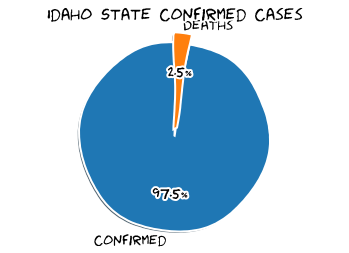

Idaho State Total Population
1754208
Idaho State Confirmed
3462 (0.1973540195917474% of population)
Idaho State Deaths
88 (2.541883304448296% of confirmed)



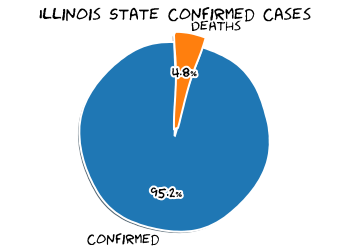

Illinois State Total Population
12741080
Illinois State Confirmed
133016 (1.0439931308805848% of population)
Illinois State Deaths
6326 (4.7558188488602875% of confirmed)



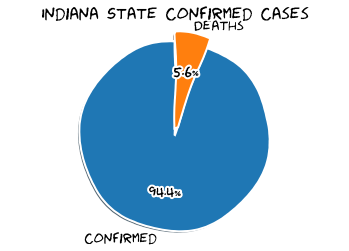

Indiana State Total Population
6691878
Indiana State Confirmed
40786 (0.609485110158912% of population)
Indiana State Deaths
2265 (5.553376158485755% of confirmed)



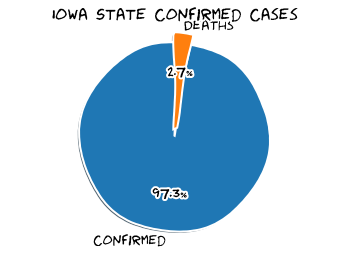

Iowa State Total Population
3156145
Iowa State Confirmed
24168 (0.7657442861465491% of population)
Iowa State Deaths
661 (2.735021516054287% of confirmed)



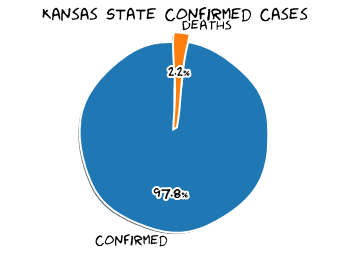

Kansas State Total Population
2911510
Kansas State Confirmed
11329 (0.3891108050461788% of population)
Kansas State Deaths
246 (2.171418483537823% of confirmed)



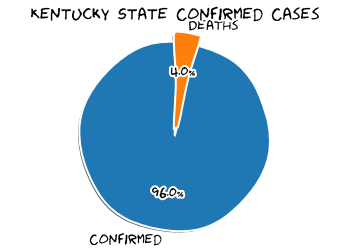

Kentucky State Total Population
4468402
Kentucky State Confirmed
12647 (0.2830318310662291% of population)
Kentucky State Deaths
505 (3.9930418281015263% of confirmed)



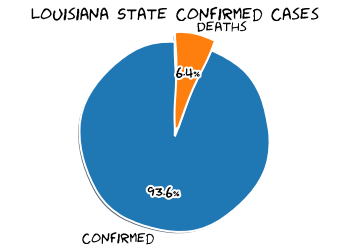

Louisiana State Total Population
4659978
Louisiana State Confirmed
47708 (1.0237816573382965% of population)
Louisiana State Deaths
3042 (6.376289091976188% of confirmed)



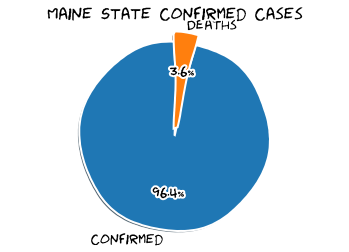

Maine State Total Population
1338404
Maine State Confirmed
2819 (0.21062399693963854% of population)
Maine State Deaths
101 (3.58283079106066% of confirmed)



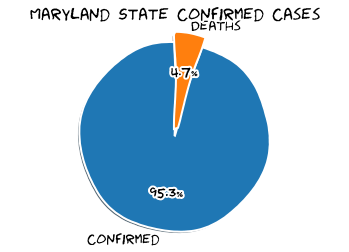

Maryland State Total Population
6042718
Maryland State Confirmed
62409 (1.0327968308300999% of population)
Maryland State Deaths
2937 (4.706052011729078% of confirmed)



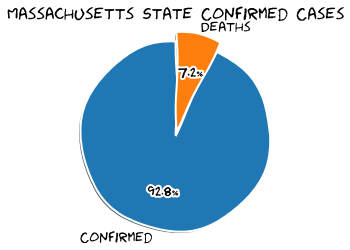

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
105690 (1.5312622199259969% of population)
Massachusetts State Deaths
7646 (7.2343646513388205% of confirmed)



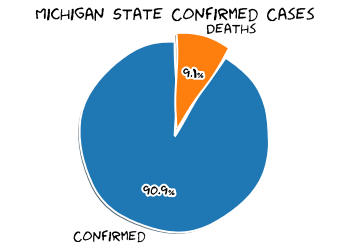

Michigan State Total Population
9995915
Michigan State Confirmed
66269 (0.6629608194947636% of population)
Michigan State Deaths
6034 (9.105313193197423% of confirmed)



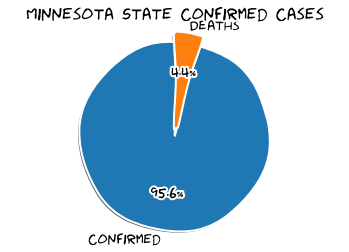

Minnesota State Total Population
5611179
Minnesota State Confirmed
30882 (0.5503656183486573% of population)
Minnesota State Deaths
1344 (4.352049737711288% of confirmed)



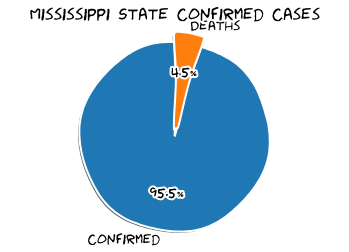

Mississippi State Total Population
2986530
Mississippi State Confirmed
20155 (0.6748634703150479% of population)
Mississippi State Deaths
915 (4.53981642272389% of confirmed)



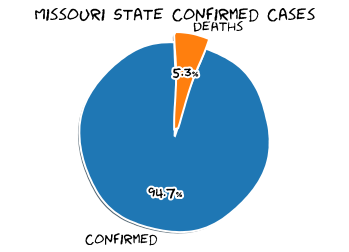

Missouri State Total Population
6126452
Missouri State Confirmed
16660 (0.2719355346291785% of population)
Missouri State Deaths
890 (5.342136854741897% of confirmed)



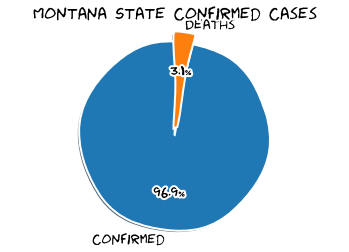

Montana State Total Population
1062305
Montana State Confirmed
614 (0.057798843081789134% of population)
Montana State Deaths
19 (3.0944625407166124% of confirmed)



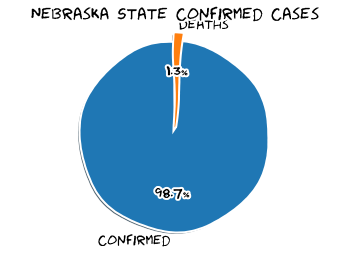

Nebraska State Total Population
1929268
Nebraska State Confirmed
16851 (0.8734400819378128% of population)
Nebraska State Deaths
220 (1.305560500860483% of confirmed)



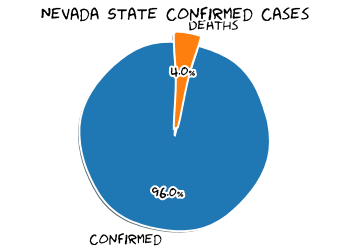

Nevada State Total Population
3034392
Nevada State Confirmed
11658 (0.38419558184967534% of population)
Nevada State Deaths
467 (4.0058329044433005% of confirmed)



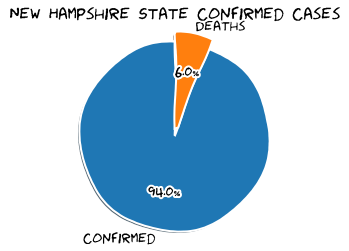

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5345 (0.39404095077031503% of population)
New Hampshire State Deaths
320 (5.9869036482694105% of confirmed)



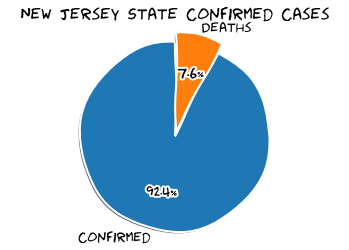

New Jersey State Total Population
8908520
New Jersey State Confirmed
167426 (1.879391863070409% of population)
New Jersey State Deaths
12792 (7.6403903814222405% of confirmed)



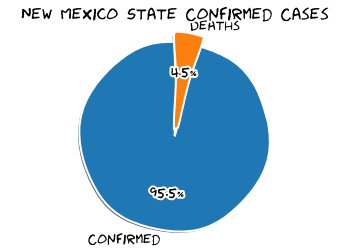

New Mexico State Total Population
2095428
New Mexico State Confirmed
9845 (0.46983241609828635% of population)
New Mexico State Deaths
440 (4.4692737430167595% of confirmed)



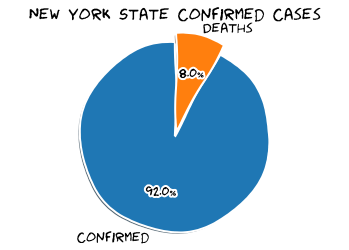

New York State Total Population
19542209
New York State Confirmed
384575 (1.9679197986266546% of population)
New York State Deaths
30882 (8.03016316713255% of confirmed)



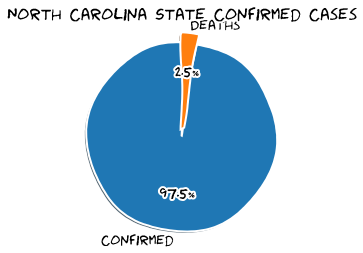

North Carolina State Total Population
10383620
North Carolina State Confirmed
45907 (0.44210978444896865% of population)
North Carolina State Deaths
1169 (2.5464526107129632% of confirmed)



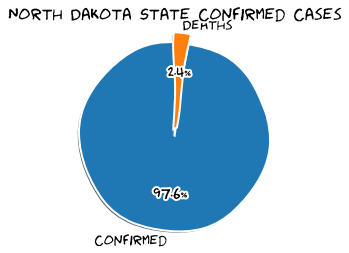

North Dakota State Total Population
760077
North Dakota State Confirmed
3124 (0.411010989676046% of population)
North Dakota State Deaths
74 (2.3687580025608197% of confirmed)



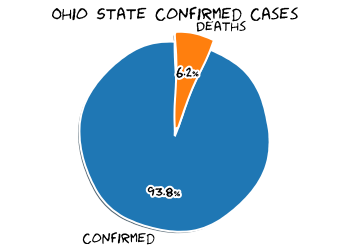

Ohio State Total Population
11689442
Ohio State Confirmed
42011 (0.3593926895740618% of population)
Ohio State Deaths
2599 (6.18647497084097% of confirmed)



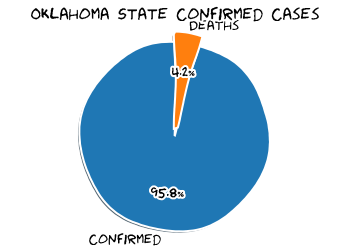

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
8652 (0.21942243612161969% of population)
Oklahoma State Deaths
363 (4.195561719833565% of confirmed)



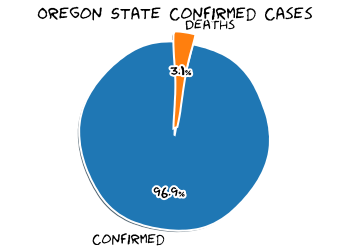

Oregon State Total Population
4190713
Oregon State Confirmed
5820 (0.13887851542207733% of population)
Oregon State Deaths
180 (3.0927835051546393% of confirmed)



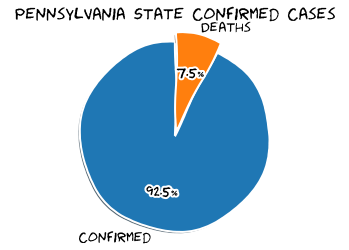

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
83977 (0.6557086481987279% of population)
Pennsylvania State Deaths
6276 (7.473474880026674% of confirmed)



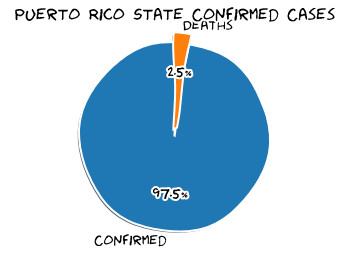

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
5951 (0.1862508618523119% of population)
Puerto Rico State Deaths
147 (2.470173080154596% of confirmed)



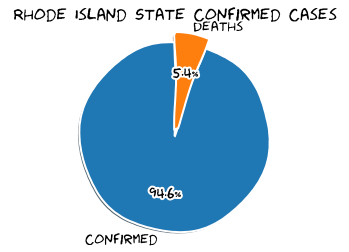

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16164 (1.5287780841092768% of population)
Rhode Island State Deaths
865 (5.351398168770107% of confirmed)



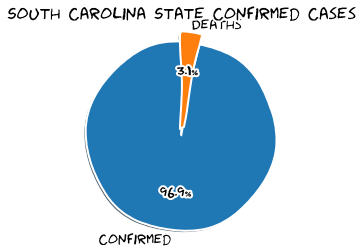

South Carolina State Total Population
5084127
South Carolina State Confirmed
19215 (0.3779409916392726% of population)
South Carolina State Deaths
598 (3.112151964610981% of confirmed)



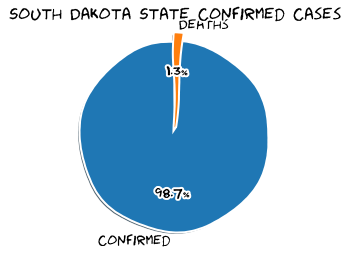

South Dakota State Total Population
882235
South Dakota State Confirmed
5966 (0.676237057019955% of population)
South Dakota State Deaths
77 (1.2906469996647671% of confirmed)



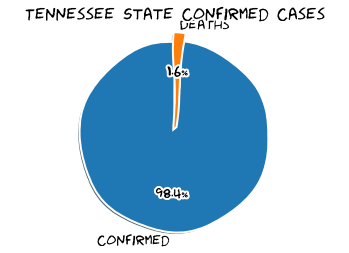

Tennessee State Total Population
6770010
Tennessee State Confirmed
31004 (0.45796091881695894% of population)
Tennessee State Deaths
482 (1.5546381112114567% of confirmed)



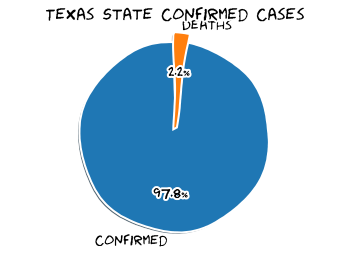

Texas State Total Population
28701845
Texas State Confirmed
90894 (0.31668347452925066% of population)
Texas State Deaths
2010 (2.2113670869364315% of confirmed)



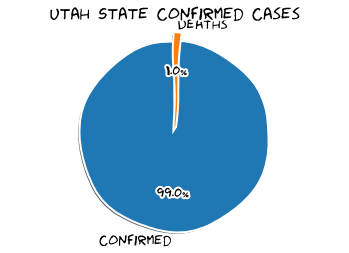

Utah State Total Population
3161105
Utah State Confirmed
14608 (0.4621168863419596% of population)
Utah State Deaths
143 (0.9789156626506025% of confirmed)



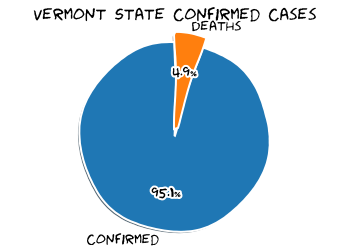

Vermont State Total Population
626299
Vermont State Confirmed
1131 (0.1805846728160192% of population)
Vermont State Deaths
55 (4.862953138815207% of confirmed)



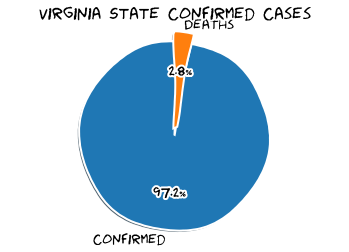

Virginia State Total Population
8517685
Virginia State Confirmed
55331 (0.6496013881706121% of population)
Virginia State Deaths
1570 (2.8374690498996946% of confirmed)



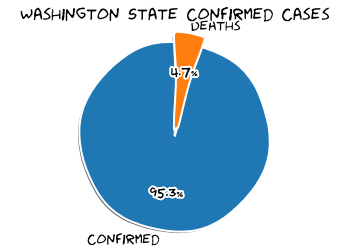

Washington State Total Population
7535591
Washington State Confirmed
26158 (0.3471260581950374% of population)
Washington State Deaths
1220 (4.663965134949155% of confirmed)



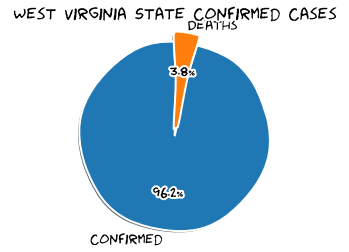

West Virginia State Total Population
1805832
West Virginia State Confirmed
2332 (0.12913715118571384% of population)
West Virginia State Deaths
88 (3.7735849056603774% of confirmed)



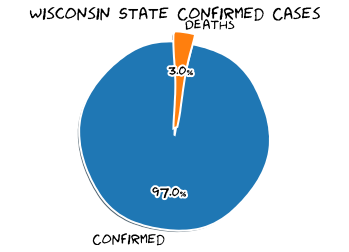

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
22932 (0.3944565540473595% of population)
Wisconsin State Deaths
694 (3.0263387406244546% of confirmed)



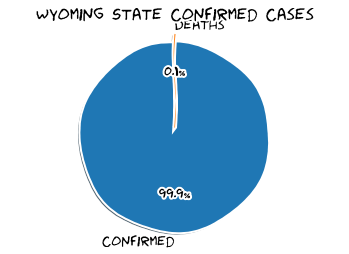

Wyoming State Total Population
577737
Wyoming State Confirmed
1079 (0.1867631811706711% of population)
Wyoming State Deaths
1 (0.09267840593141798% of confirmed)



In [10]:
for i in states:
    state_details(i)

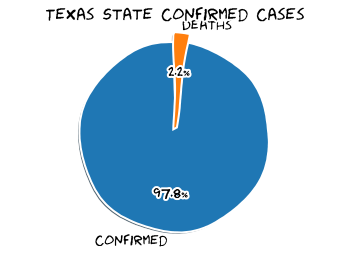

Texas State Total Population
28701845
Texas State Confirmed
90894 (0.31668347452925066% of population)
Texas State Deaths
2010 (2.2113670869364315% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2124155
US Deaths
116320

New York City Confirmed
210591
New York City Deaths
22145

Philippines Confirmed
26781
Philippines Deaths
1103



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 8085932},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 438453},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-16T18:33:13.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 3917055},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-16 04:33:09,34.22333378,-82.46170658,70,0,0,70,"Abbeville, South Carolina, US",285.3997635259102,0.0
1,22001,Acadia,Louisiana,US,2020-06-16 04:33:09,30.2950649,-92.41419698,597,31,0,566,"Acadia, Louisiana, US",962.2048513175921,5.192629815745394
2,51001,Accomack,Virginia,US,2020-06-16 04:33:09,37.76707161,-75.63234615,996,14,0,982,"Accomack, Virginia, US",3082.0646119569255,1.4056224899598393
3,16001,Ada,Idaho,US,2020-06-16 04:33:09,43.4526575,-116.24155159999998,892,22,0,870,"Ada, Idaho, US",185.22094657870747,2.4663677130044843
4,19001,Adair,Iowa,US,2020-06-16 04:33:09,41.33075609,-94.47105874,11,0,0,11,"Adair, Iowa, US",153.80313199105146,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3741,,,,West Bank and Gaza,2020-06-16 04:33:09,31.9522,35.2332,505,3,415,87,West Bank and Gaza,9.899212297134756,0.594059405940594
3742,,,,Western Sahara,2020-06-16 04:33:09,24.2155,-12.8858,9,1,8,0,Western Sahara,1.5067048365225253,11.11111111111111
3743,,,,Yemen,2020-06-16 04:33:09,15.552726999999999,48.516388,844,208,79,557,Yemen,2.8297488953250403,24.644549763033176
3744,,,,Zambia,2020-06-16 04:33:09,-13.133897,27.849332,1382,11,1142,229,Zambia,7.517424432477972,0.7959479015918958


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592332393000,40.767273,-73.971526,210591,0,22145,188446,New York City,36061,"New York City, New York, US",2526.036016,None,None,84036061,USA
1,Illinois,US,1592332393000,41.841448,-87.816588,85184,0,4206,80978,Cook,17031,"Cook, Illinois, US",1653.983422,None,None,84017031,USA
2,California,US,1592332393000,34.308284,-118.228241,73832,0,2926,70906,Los Angeles,06037,"Los Angeles, California, US",735.443900,None,None,84006037,USA
3,New York,US,1592332393000,40.740665,-73.589419,41290,0,2170,39120,Nassau,36059,"Nassau, New York, US",3042.911762,None,None,84036059,USA
4,New York,US,1592332393000,40.883201,-72.801217,40738,0,1957,38781,Suffolk,36103,"Suffolk, New York, US",2758.903726,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,Wyoming,US,1592332393000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3021,Montana,US,1592332393000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA
3022,Kansas,US,1592332393000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
3023,Kentucky,US,1592332393000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592332393000,40.767273,-73.971526,210591,0,22145,188446,New York City,36061,"New York City, New York, US",2526.036016,None,None,84036061,USA
3,New York,US,1592332393000,40.740665,-73.589419,41290,0,2170,39120,Nassau,36059,"Nassau, New York, US",3042.911762,None,None,84036059,USA
4,New York,US,1592332393000,40.883201,-72.801217,40738,0,1957,38781,Suffolk,36103,"Suffolk, New York, US",2758.903726,None,None,84036103,USA
5,New York,US,1592332393000,41.162784,-73.757417,34358,0,1405,32953,Westchester,36119,"Westchester, New York, US",3551.192447,None,None,84036119,USA
24,New York,US,1592332393000,41.150279,-74.025605,13460,0,661,12799,Rockland,36087,"Rockland, New York, US",4131.508430,None,None,84036087,USA
33,New York,US,1592332393000,41.403375,-74.302408,10580,0,473,10107,Orange,36071,"Orange, New York, US",2748.480283,None,None,84036071,USA
65,New York,US,1592332393000,42.762490,-78.730637,6852,0,587,6265,Erie,36029,"Erie, New York, US",745.834884,None,None,84036029,USA
97,New York,US,1592332393000,41.764861,-73.743567,4075,0,145,3930,Dutchess,36027,"Dutchess, New York, US",1385.027429,None,None,84036027,USA
111,New York,US,1592332393000,43.146389,-77.693229,3402,0,247,3155,Monroe,36055,"Monroe, New York, US",458.632730,None,None,84036055,USA
146,New York,US,1592332393000,43.004919,-76.199712,2545,0,166,2379,Onondaga,36067,"Onondaga, New York, US",552.626550,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

384575

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1592332393000,40.767273,-73.971526,210591,0,22145,188446,New York City,36061,"New York City, New York, US",2526.036016,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
59,None,Philippines,1592332393000,12.879721,121.774017,26781,6552,1103,19126,None,None,Philippines,24.439437,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
